<a href="https://colab.research.google.com/github/pragya-g10/Data-Preprocessing/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing:
Feature scaling, Handling missing values, Categorical variable, encoding , data discretisation.

*Feature Scaling

*Standardization- It is a process of centering a variable at zero and standardizing the data variance to 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

titanic_data= sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_data=titanic_data[["age","fare","pclass"]]
titanic_data.head()


,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [ ]:
# import a library to normalise and standardize
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled= scaler.transform(titanic_data)

In [ ]:
titanic_data_scaled= pd.DataFrame(titanic_data_scaled, columns= titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


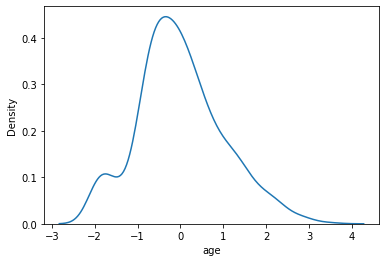

In [ ]:
sns.kdeplot(titanic_data_scaled["age"])

Min , Max scalling- In this we subtract each value by the min value and then devide the result by difference of min and max value.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled=scaler.transform(titanic_data)


In [ ]:
titanic_data_scaled= pd.DataFrame(titanic_data_scaled, columns= titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


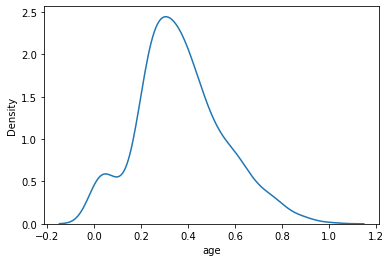

In [ ]:
sns.kdeplot(titanic_data_scaled["age"])

Handling missing data values -Imputation 
Mean or Median Imputation



In [ ]:
titanic_data=sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_data=titanic_data[["survived","pclass","age","fare"]]
titanic_data.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [ ]:
titanic_data.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [ ]:
median=titanic_data.age.median()
print(median)

mean=titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [ ]:
titanic_data["Median_Age"]=titanic_data.age.fillna(median)
titanic_data["Mean_Age"]=titanic_data.age.fillna(mean)
titanic_data.head(20)

,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.000000
1,1,1,38.0,71.2833,38.0,38.000000
2,1,3,26.0,7.9250,26.0,26.000000
3,1,1,35.0,53.1000,35.0,35.000000
4,0,3,35.0,8.0500,35.0,35.000000
5,0,3,NaN,8.4583,28.0,29.699118
6,0,1,54.0,51.8625,54.0,54.000000
7,0,3,2.0,21.0750,2.0,2.000000
8,1,3,27.0,11.1333,27.0,27.000000
9,1,2,14.0,30.0708,14.0,14.000000


For categorical variables we do frequent category imputation

In [ ]:
titanic_data=sns.load_dataset("titanic")
titanic_data=titanic_data[["embark_town","age","fare"]]
titanic_data.isnull().mean()


embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [ ]:
titanic_data.isnull().sum()

embark_town      2
age            177
fare             0
dtype: int64

Text(0, 0.5, 'number of passengers')

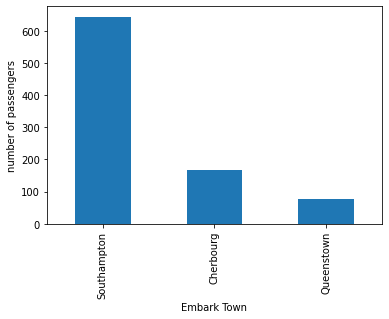

In [ ]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('number of passengers')


In [ ]:
titanic_data.embark_town.fillna('Southampton',inplace=True)
titanic_data.isnull().sum()

embark_town      0
age            177
fare             0
dtype: int64

In [ ]:
titanic_data['age_mode']=titanic_data.age.fillna(24)
titanic_data.head(20)


,embark_town,age,fare,age_mode
0,Southampton,22.0,7.2500,22.0
1,Cherbourg,38.0,71.2833,38.0
2,Southampton,26.0,7.9250,26.0
3,Southampton,35.0,53.1000,35.0
4,Southampton,35.0,8.0500,35.0
5,Queenstown,NaN,8.4583,24.0
6,Southampton,54.0,51.8625,54.0
7,Southampton,2.0,21.0750,2.0
8,Southampton,27.0,11.1333,27.0
9,Cherbourg,14.0,30.0708,14.0


Categorical Data Encoding- For every different category a new column is specified.

One-Hot coding


In [ ]:
titanic_data=sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_data=titanic_data[["sex","class","embark_town"]]
titanic_data.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [ ]:
temp=pd.get_dummies(titanic_data['sex'],drop_first=True)
temp.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
temp=pd.get_dummies(titanic_data['embark_town'],drop_first=True)
temp.head()

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Label Encoding - Either making a new column it  makes changes in the same column

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(titanic_data['class'])
titanic_data['le_class']=le.transform(titanic_data['class'])

titanic_data.head()


,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2


In [ ]:
#Data Discretization

diamond_data= sns.load_dataset('diamonds')
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
price_range=diamond_data['price'].max()-diamond_data['price'].min()
print(price_range)

18497


In [ ]:
lower_interval= int(np.floor(diamond_data['price'].min()))
upper_interval= int(np.ceil(diamond_data['price'].max()))
interval_length=int(np.round(price_range/10))

print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


In [ ]:
total_bins=[i for i in range(lower_interval, upper_interval + interval_length, interval_length)]
print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826, 20676, 22526, 24376, 26226, 28076, 29926, 31776, 33626, 35476, 37326, 39176, 41026, 42876, 44726, 46576, 48426, 50276, 52126, 53976, 55826, 57676, 59526, 61376, 63226, 65076, 66926, 68776, 70626, 72476, 74326, 76176, 78026, 79876, 81726, 83576, 85426, 87276, 89126, 90976, 92826, 94676, 96526, 98376, 100226, 102076, 103926, 105776, 107626, 109476, 111326, 113176, 115026, 116876, 118726, 120576, 122426, 124276, 126126, 127976, 129826, 131676, 133526, 135376, 137226, 139076, 140926, 142776, 144626, 146476, 148326, 150176, 152026, 153876, 155726, 157576, 159426, 161276, 163126, 164976, 166826, 168676, 170526, 172376, 174226, 176076, 177926, 179776, 181626, 183476, 185326, 187176, 189026, 190876, 192726, 194576, 196426, 198276, 200126, 201976, 203826, 205676, 207526, 209376, 211226, 213076, 214926, 216776, 218626, 220476, 222326, 224176, 226026, 227876, 229726, 231576, 233426, 235276, 237126, 238976, 240826, 242676, 2445

In [ ]:
bin_labels=['Bin_no'+ str(i) for i in range (1, len(total_bins))]
print(bin_labels)
 

['Bin_no1', 'Bin_no2', 'Bin_no3', 'Bin_no4', 'Bin_no5', 'Bin_no6', 'Bin_no7', 'Bin_no8', 'Bin_no9', 'Bin_no10', 'Bin_no11', 'Bin_no12', 'Bin_no13', 'Bin_no14', 'Bin_no15', 'Bin_no16', 'Bin_no17', 'Bin_no18', 'Bin_no19', 'Bin_no20', 'Bin_no21', 'Bin_no22', 'Bin_no23', 'Bin_no24', 'Bin_no25', 'Bin_no26', 'Bin_no27', 'Bin_no28', 'Bin_no29', 'Bin_no30', 'Bin_no31', 'Bin_no32', 'Bin_no33', 'Bin_no34', 'Bin_no35', 'Bin_no36', 'Bin_no37', 'Bin_no38', 'Bin_no39', 'Bin_no40', 'Bin_no41', 'Bin_no42', 'Bin_no43', 'Bin_no44', 'Bin_no45', 'Bin_no46', 'Bin_no47', 'Bin_no48', 'Bin_no49', 'Bin_no50', 'Bin_no51', 'Bin_no52', 'Bin_no53', 'Bin_no54', 'Bin_no55', 'Bin_no56', 'Bin_no57', 'Bin_no58', 'Bin_no59', 'Bin_no60', 'Bin_no61', 'Bin_no62', 'Bin_no63', 'Bin_no64', 'Bin_no65', 'Bin_no66', 'Bin_no67', 'Bin_no68', 'Bin_no69', 'Bin_no70', 'Bin_no71', 'Bin_no72', 'Bin_no73', 'Bin_no74', 'Bin_no75', 'Bin_no76', 'Bin_no77', 'Bin_no78', 'Bin_no79', 'Bin_no80', 'Bin_no81', 'Bin_no82', 'Bin_no83', 'Bin_no84', 

In [ ]:
diamond_data['price_bins']=pd.cut(x=diamond_data['price'],bins=total_bins,labels=bin_labels,include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no1


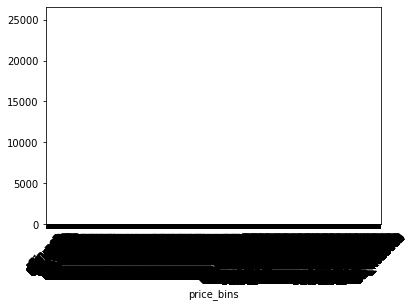

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)
plt.show()